<a href="https://colab.research.google.com/github/shafkat2/Industrial_Development_A.I/blob/master/Exploratory_Data_analysis_Accelo_Gyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Loading Drives and Importing Libraries***

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
!pip install xlrd
from scipy import signal
import random
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import math
import time as time
import seaborn as sns
from scipy.signal import medfilt
from scipy.signal import savgol_filter
from keras.models import model_from_json
import pywt
from statsmodels.robust import mad
from scipy.signal import sosfiltfilt, butter
#from pandas.tools.plotting import table
import matplotlib.dates as md
import scipy.stats as st

# ***Functions ***

In [0]:
# removing nan columns and arbitary columns from data which contained NaN
def initial_prep(data):
  
  data = data.drop([0], axis=0)
  data = data.reset_index()
  data = data.drop(columns=['Unnamed: 8',	'Generation.1','Timestamp.1','Speed'])
  
  return data
  
#using brute force to check which distribution the data falls under  
def get_best_distribution(data):
    value_list = []
    dist_names = ["norm", "exponweib", "weibull_max", "pareto", "genextreme","lognorm","tukeylambda","vonmises_line","dgamma","exponnorm","chi","chi2","burr12","burr"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    value_list.append(best_dist)
    print("Best p value: "+ str(best_p))
    value_list.append(best_p)
    print("Parameters for the best fit: "+ str(params[best_dist]))
    value_list.append(params[best_dist])
    
    
    return value_list

# ***Preprocessing***

In [0]:
GyroLinear_acceleration = pd.read_csv('/content/drive/My Drive/Research_NSU/Raw_Data/GyroLinearAcceleration-2019-1-6-6-44-54_ok.csv')

In [0]:
data = initial_prep(GyroLinear_acceleration)

In [38]:
data.head(3)

,index,Generation,Timestamp,AX,AY,AZ,lAX,lAY,lAZ
0,1,6603.0,6:44:18,0.098165,4.678413,8.269825,-4.835621,-4.134902,10.325537
1,2,6604.0,6:44:18,-0.196331,4.546728,8.913885,-4.835621,-4.134902,10.325537
2,3,6605.0,6:44:18,-0.201119,4.635316,9.016839,-4.835621,-4.134902,10.325537


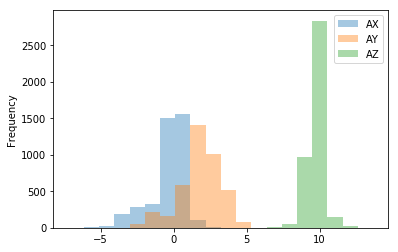

In [86]:
data[["AX", "AY","AZ"]].plot.hist(bins=20,alpha=0.4) 

In [87]:
result  = get_best_distribution(data["AX"])

p value for norm = 1.3665352038186246e-83
p value for exponweib = 1.5704848136281463e-28
p value for weibull_max = 1.9879142168878005e-77


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 1.917653884987496e-77
p value for lognorm = 1.7113511772411136e-82


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1682: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:6470: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


p value for tukeylambda = 1.3285388433995205e-25
p value for vonmises_line = 1.4826261743417455e-55
p value for dgamma = 6.9124589765270895e-34
p value for exponnorm = 1.4094879973943666e-83


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:1415: RuntimeWarning: divide by zero encountered in log
  return exparg + np.log(0.5 * invK * sc.erfc(-(x - invK) / np.sqrt(2)))


p value for chi = 1.3010503851921696e-89
p value for chi2 = 7.6445977765052135e-106


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1059: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


p value for burr12 = 2.2157456291029044e-25
p value for burr = 8.51427793410157e-64
Best fitting distribution: burr12
Best p value: 2.2157456291029044e-25
Parameters for the best fit: (56.302083200178615, 236.4257435881803, -51.71534888784863, 57.16047919321621)
